<font color = brown>**file to be named: Group_Facilitator_Name.ipynb**</font>

In [1]:
#importing necessasery libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2')
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('/Volumes/BINAY B/1A-IIITB-UpGrad/EPGP ML C54/Statistics Essentials/Module1 LCCS')

In [2]:
# importing the data set
loan = pd.read_csv('loan.csv',low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#checking dimension
loan.shape

(39717, 111)

```From above we can see that the dataset has 111 features which is very humongous. These need to be reduced which we are going to do now.```

## Data Cleaning

In [5]:
#getting all the missing value details
pd.set_option('display.max_rows',None)
loan.isnull().sum().sort_values(ascending=False)/len(loan)*100

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [6]:
#creating a list of columsn with features having null value = 100%
null_values = loan.isnull().mean()
null_cols = null_values[null_values == 1.0].index.tolist()
print(null_cols, end = '')

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

### Removing all the features with 100 % null values 

In [7]:
#removing columns with 100% nulll values
loan_sub = loan.drop(null_cols, axis=1)
loan_sub.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Removing columns with single values
- we can observe that there are few columns with single value we can remove them as they wont contribute to the purpose here

In [8]:
single_val_cols=['initial_list_status','tax_liens', 'delinq_amnt',
                 'chargeoff_within_12_mths','acc_now_delinq','policy_code','collections_12_mths_ex_med', 
                 'application_type', 'pymnt_plan' ]

In [9]:
loan_sub.drop(single_val_cols, axis = 1, inplace=True)

In [10]:
loan_sub.shape

(39717, 48)

In [11]:
loan_sub.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39020.000000
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.146512,NaN,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,NaN,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,NaN,2678.826162,NaN,NaN,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,NaN,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.678594,0.491812,NaN,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,NaN,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,NaN,4447.136012,NaN,NaN,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,NaN,NaN,NaN,4.040400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.170000,0.000000,NaN,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,NaN,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,NaN,218.680000,NaN,NaN,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.400000,0.000000,NaN,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,NaN,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,NaN,546.140000,NaN,NaN,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,NaN,NaN,NaN,8.230000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.600000,0.000000,NaN,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,NaN,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,

### <font color = Brown>Further reducing features</font>
- By descriptive analysis of loan dataset we can conclude on below assumptions-
    - ``desc`` dont have any purpuse in this analysis, but text analysis can be done futher on it to understand the sentiment of the borrower. So now removing the desc column.
    - Also there are some columns such as ``"id", "member_id", "url", "emp_title", "zip_code", "last_credit_pull_d", "addr_state"``.
    - ``title`` is derived from ``purpose`` so we can remove one of them, hence we are removing title.
    - ``funded_amnt`` and ``funded_amnt_int`` both contain the same details so we can drop ``funded_amnt`` column.
    - ``out_prncp_inv`` and ``total_pymnt_inv`` are usefull for investors and won't be utilised in this case so removing them.

### list of post approval features which won't be usefull in this analysis 

- delinq_2yrs,earliest_cr_line, mths_since_last_delinq,mths_since_last_record,pub_rec, revol_bal, out_prncp, out_prncp_inv, total_pymnt,total_pymnt_inv ,total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee,last_pymnt_amnt, next_pymnt_d,last_credit_pull_d, last_pymnt_d


In [12]:
othr_cols = ['id','member_id','funded_amnt', 'emp_title','delinq_2yrs', 'earliest_cr_line',
             'mths_since_last_delinq','url', 'desc','title','zip_code', 'addr_state', 
             'mths_since_last_record', 'pub_rec','revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
             'total_pymnt_inv' ,'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
             'collection_recovery_fee','last_pymnt_amnt', 'next_pymnt_d','last_credit_pull_d', 'last_pymnt_d']

In [13]:
# removing the mentioned columns
loan_sub.drop(othr_cols, axis=1, inplace=True)

In [14]:
loan_sub.shape

(39717, 20)

**Now we are left with only 20 features**

In [15]:
loan_sub.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
revol_util                50
issue_d                    0
total_acc                  0
open_acc                   0
inq_last_6mths             0
dti                        0
purpose                    0
loan_status                0
loan_amnt                  0
funded_amnt_inv            0
annual_inc                 0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
verification_status        0
dtype: int64

### Handeling null values
- emp_length, pub_rec_bankrupties, revol_util have null values these needs to be handelled
- pub_rec_bankruptcies has 697 null values, this report contains bankruptcie details and these can't be filled with other values so it will be better to remove rows with null value
- emp_length has 1075 null value records, the null value is total 2% of the dataset so removing it won't may improve the accuracy.
- revol_util has 50 null values which is very low for this data set so we can safely drop the null values

In [16]:
#removing null values from pub_rec_bankruptcies 
loan_sub = loan_sub[~loan_sub.pub_rec_bankruptcies.isnull()]
loan_sub.pub_rec_bankruptcies.isnull().sum()

0

In [17]:
loan_sub = loan_sub[~loan_sub.emp_length.isnull()]
loan_sub.emp_length.isnull().sum()

0

In [18]:
loan_sub.dropna(subset=['revol_util'], axis=0, inplace = True)
loan_sub.revol_util.isnull().sum()

0

In [19]:
#Analyzing the loan_status column
loan_sub.loan_status.value_counts()

Fully Paid     31534
Charged Off     5266
Current         1098
Name: loan_status, dtype: int64

### <font color = blue>The goal is here to see who is likely to default this can only be said in case of either fully paid or charged off(defaulted)</font>
- **Hence removing the data with Current status**

In [20]:
#removing recods containing current loan details
current = loan_sub[loan_sub.loan_status == 'Current'].index.tolist()
loan_sub.drop(current, inplace=True)
loan_sub.loan_status.value_counts()

Fully Paid     31534
Charged Off     5266
Name: loan_status, dtype: int64

In [21]:
#converting the values to categorical 0 for fully paid and 1 for charged off
loan_sub['loan_status'] = loan_sub['loan_status'].apply(lambda x: 0 if (x == 'Fully Paid') else 1)

In [22]:
#viewing data structure and feature information
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt_inv       36800 non-null  float64
 2   term                  36800 non-null  object 
 3   int_rate              36800 non-null  object 
 4   installment           36800 non-null  float64
 5   grade                 36800 non-null  object 
 6   sub_grade             36800 non-null  object 
 7   emp_length            36800 non-null  object 
 8   home_ownership        36800 non-null  object 
 9   annual_inc            36800 non-null  float64
 10  verification_status   36800 non-null  object 
 11  issue_d               36800 non-null  object 
 12  loan_status           36800 non-null  int64  
 13  purpose               36800 non-null  object 
 14  dti                   36800 non-null  float64
 15  inq_last_6mths     

### Standardizing the data
- int_rate column although described as an object column, it has continous values. same for emp_length
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- term column is also contains numerical value in months it can be cosidered as categorical feature

In [23]:
loan_sub.int_rate = loan_sub.int_rate.apply(lambda x: float(x.split('%')[0]))
loan_sub.int_rate.dtypes

dtype('float64')

In [24]:
loan_sub.revol_util = loan_sub.revol_util.apply(lambda x: float(x.split('%')[0]))
loan_sub.revol_util.dtypes

dtype('float64')

In [25]:
loan_sub.emp_length = pd.to_numeric(loan_sub.emp_length.apply(lambda x: 0 if '<' in x else(x.split('+')[0] if '+' in x else x.split()[0])))
loan_sub.emp_length.value_counts()

10    8368
0     4329
2     4202
3     3947
4     3290
5     3157
1     3071
6     2133
7     1686
8     1408
9     1209
Name: emp_length, dtype: int64

In [26]:
loan_sub.term.value_counts()

 36 months    27546
 60 months     9254
Name: term, dtype: int64

In [27]:
#Extracting the numerical part from the term feature
loan_sub.term = pd.to_numeric(loan_sub.term.apply(lambda x: x.split(' ')[1]))
loan_sub.term.value_counts()

36    27546
60     9254
Name: term, dtype: int64

In [28]:
loan_sub.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,1,3,83.7,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,5,3,9.4,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,2,2,98.5,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,1,10,21.0,37,0.0
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,3,9,28.3,12,0.0


### Univariate analysis
- Analysing numerical features

In [29]:
loan_sub.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,inq_last_6mths,open_acc,revol_util,total_acc,pub_rec_bankruptcies
count,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,3.680000e+04,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000,36800.000000
mean,11149.540761,10439.055845,42.035217,11.983745,324.906537,4.964293,6.943448e+04,0.143098,13.334529,0.869755,9.302473,48.992830,22.152120,0.041821
std,7369.855703,7008.522880,10.412700,3.701182,208.891979,3.552080,6.402159e+04,0.350177,6.650154,1.068063,4.375839,28.313209,11.407797,0.200859
min,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,5500.000000,5000.000000,36.000000,8.940000,167.730000,2.000000,4.113300e+04,0.000000,8.220000,0.000000,6.000000,25.600000,14.000000,0.000000
50%,10000.000000,9000.000000,36.000000,11.830000,280.110000,4.000000,6.000000e+04,0.000000,13.430000,1.000000,9.000000,49.500000,20.000000,0.000000
75%,15000.000000,14350.000000,60.000000,14.460000,429.365000,9.000000,8.300000e+04,0.000000,18.590000,1.000000,12.000000,72.500000,29.000000,0.000000
max,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,1.000000,29.990000,8.000000,44.000000,99.900000,90.000000,2.000000


<AxesSubplot:>

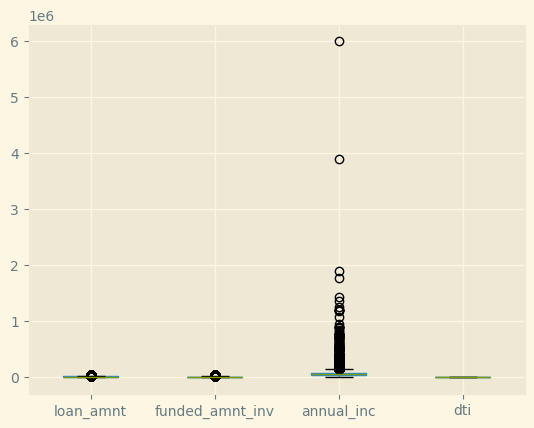

In [30]:
loan_sub.boxplot(['loan_amnt','funded_amnt_inv','annual_inc', 'dti'])

- We can clearly see that Annual income has outliers and this need to be fixed.
- To fix it first we need to see quantile info

In [31]:
quantile_ann_inc = loan_sub.annual_inc.quantile([0.5, 0.75, 0.90, 0.95, 0.97,0.99])
quantile_ann_inc

0.50     60000.00
0.75     83000.00
0.90    116738.90
0.95    142000.00
0.97    165996.12
0.99    235000.00
Name: annual_inc, dtype: float64

- The values after 95 percentile seems to be disconected from the gebral distribution.
- So, considering threshold for removing outliers as 0.95

In [32]:
quan_95 = loan_sub.annual_inc.quantile(0.95)
loan_sub = loan_sub[loan_sub.annual_inc <= quan_95]

In [33]:
loan_sub.annual_inc.plot.box()

<AxesSubplot:>

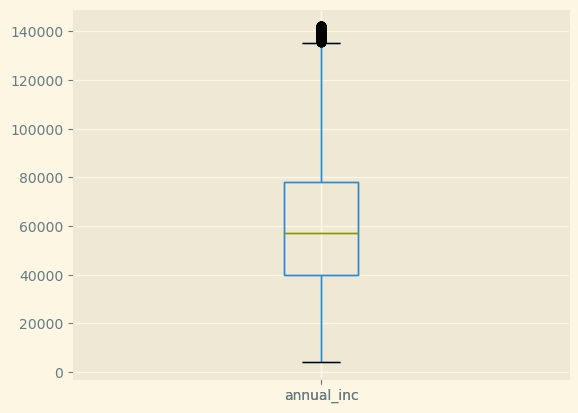

In [34]:
loan_sub.boxplot(['annual_inc'])
plt.show()

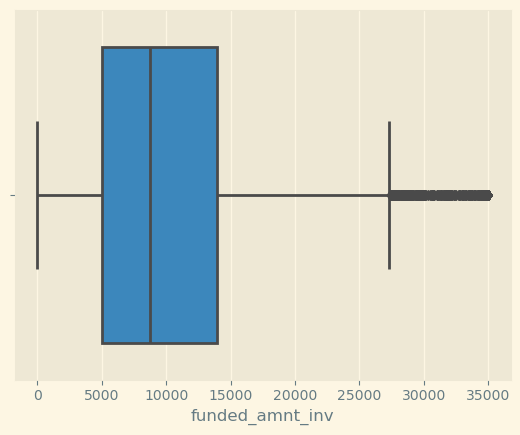

In [35]:
sns.boxplot(x = loan_sub['funded_amnt_inv'])
plt.show()

In [36]:
loan_sub.funded_amnt_inv.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.985, 0.99, 1.0])

0.500     8725.0
0.750    13925.0
0.900    19850.0
0.950    23975.0
0.970    24975.0
0.985    29975.0
0.990    32000.0
1.000    35000.0
Name: funded_amnt_inv, dtype: float64

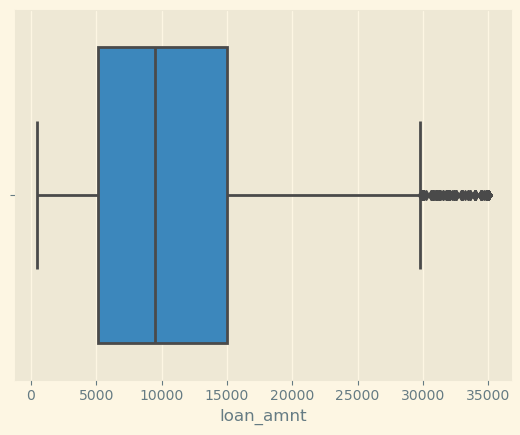

In [37]:
sns.boxplot(x=loan_sub['loan_amnt'])
plt.show()

- The median loan amount is arrount 10000

In [38]:
loan_sub.loan_amnt.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.98, 0.985,0.993,1.0])

0.500     9500.00
0.750    15000.00
0.900    20000.00
0.950    25000.00
0.970    26000.00
0.980    30000.00
0.985    30665.25
0.993    35000.00
1.000    35000.00
Name: loan_amnt, dtype: float64

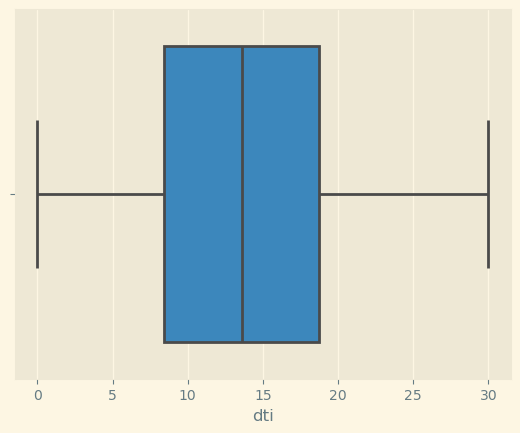

In [39]:
sns.boxplot(x = loan_sub['dti'])
plt.show()

**Observation:-**
- Although above columns ahs data points outside teh distribution but all the data points are continous and no need to remove outliersfor the above columns
- dti feature dosen't have any outlier

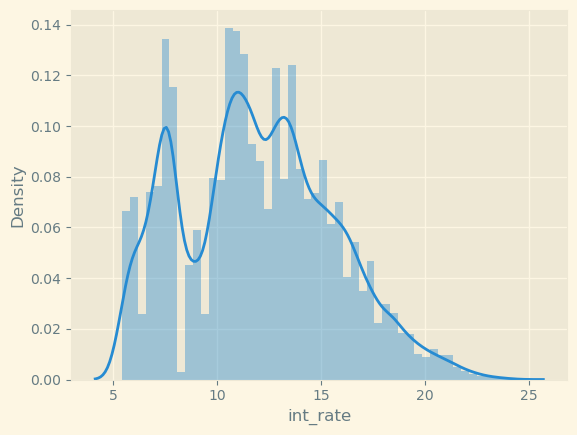

In [40]:
sns.distplot(loan_sub['int_rate'])
plt.show()

In [41]:
loan_sub.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

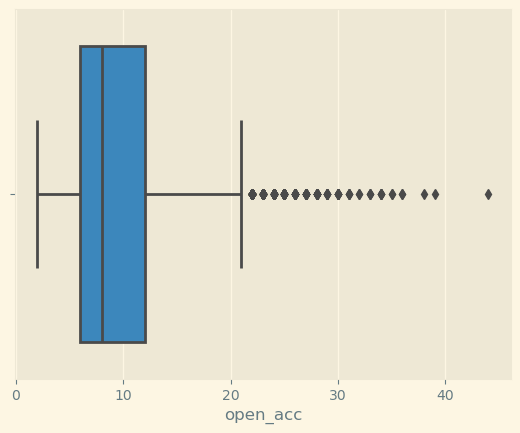

In [42]:
sns.boxplot(x= 'open_acc', data= loan_sub)
plt.show()

In [43]:
loan_sub.open_acc.value_counts()

7     3624
6     3545
8     3510
9     3307
5     2857
10    2813
11    2399
4     2118
12    1984
13    1643
3     1341
14    1269
15    1009
16     793
17     612
2      511
18     452
19     333
20     238
21     207
22     121
23      77
24      57
25      51
26      22
27      20
28      20
30      10
29       8
34       5
31       4
33       3
32       2
36       2
35       2
39       1
38       1
44       1
Name: open_acc, dtype: int64

- From above we can conclude that the tenure frequency is higher for 36 than 60 months. 

In [44]:
#avg interate rate
round(np.mean(loan_sub.int_rate),2)

11.94

### Analysing categorical data

In [45]:
#extracting all the categoical columns
cat_vars = []
for i in loan_sub.columns:
    if loan_sub[i].dtype == 'object':
        cat_vars.append(i)
print(cat_vars)

['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose']


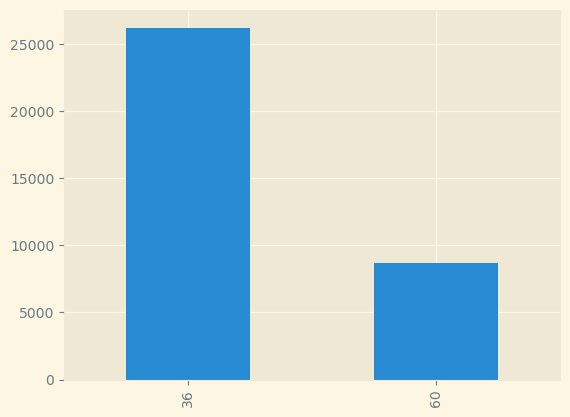

In [46]:
loan_sub.term.value_counts().plot(kind = 'bar')
plt.show()

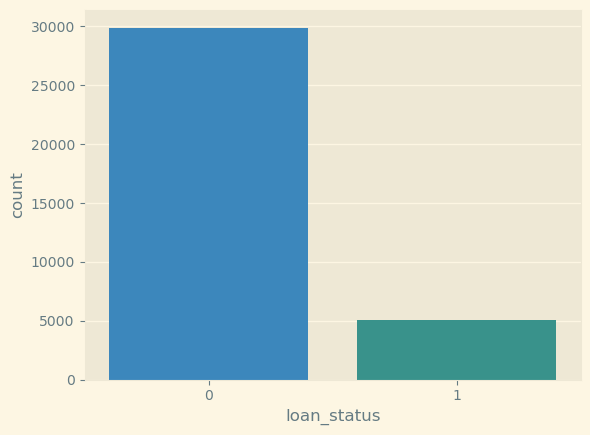

In [47]:
sns.countplot(x='loan_status', data=loan_sub)
plt.show()

- From above we can the number of defaulters is way less than  fully paid loans

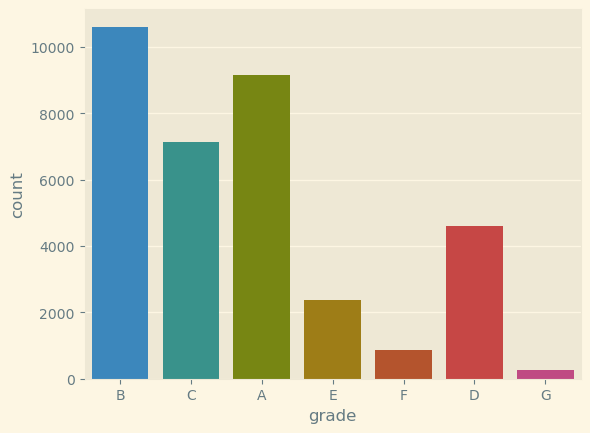

In [104]:
#GRADE-B has higher applicants while G has sthe lowest
sns.countplot(x=loan_sub['grade'])
plt.show()

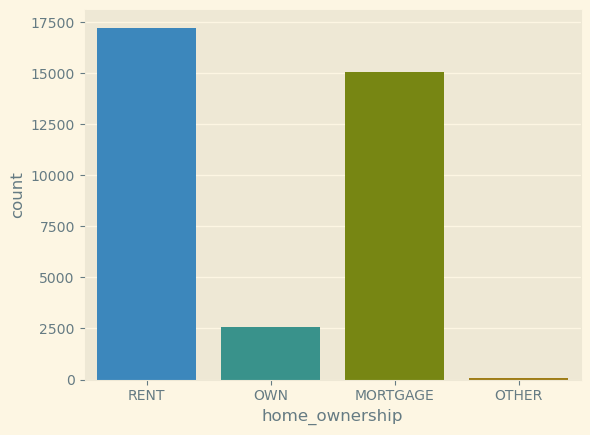

In [49]:
#most of the applicants are rented or with mortage status
sns.countplot(x = loan_sub['home_ownership'])
plt.show()

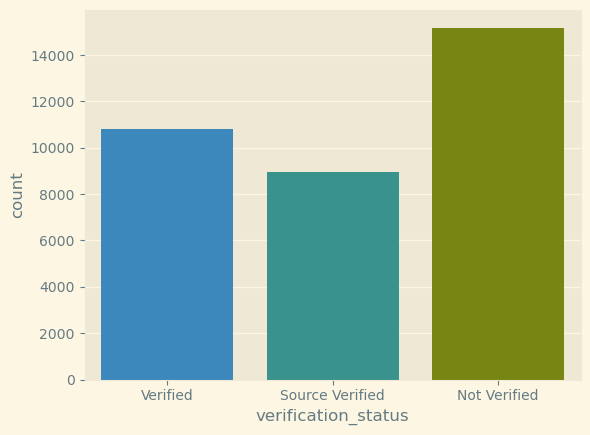

In [50]:
#Not verified loan applicats are high than verified and source verified
sns.countplot(x=loan_sub.verification_status)
plt.show()

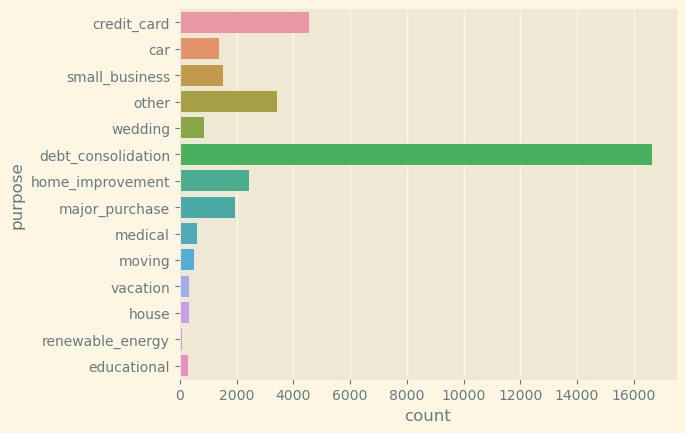

In [51]:
#debit consolidation is the top ranked loan purpose
sns.countplot(y = loan_sub.purpose)
plt.show()

### Bi-variate analysis

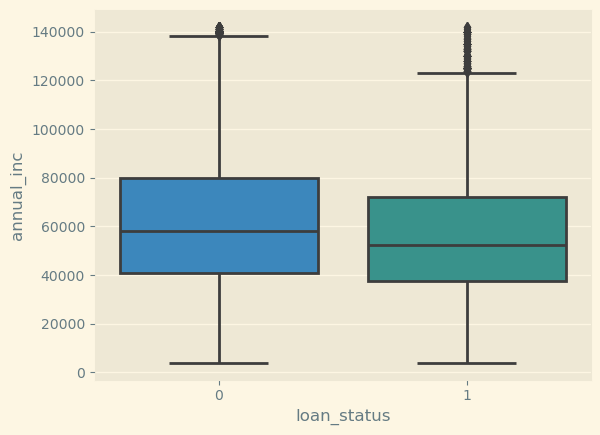

In [52]:
#analyze raltionship between 'loan_status' vs 'annual_inc'
sns.boxplot(x='loan_status',y='annual_inc', data=loan_sub )
plt.show()

**Observation**
- From above we can say that people with on an average low salary tend to default more than the high salary group
- Annual_inc can be a good predictor for loan default analysis.

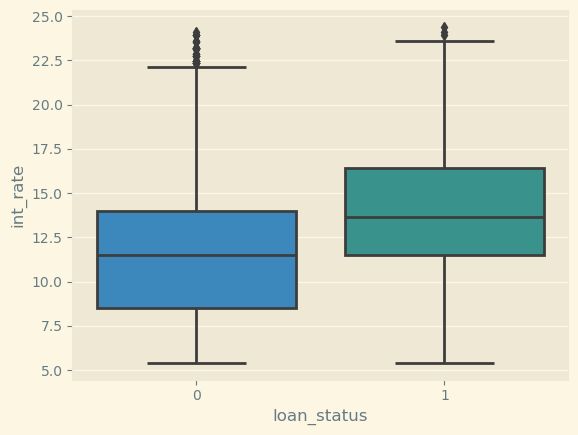

In [53]:
#analyze relationship between 'loan_status' vs 'int_rate'
sns.boxplot(x='loan_status', y='int_rate', data=loan_sub)
plt.show()

**Observation**
- From above we can conclude that the people with high interate rate are more likley to default
- int_rate could alos be a good predictor of default.

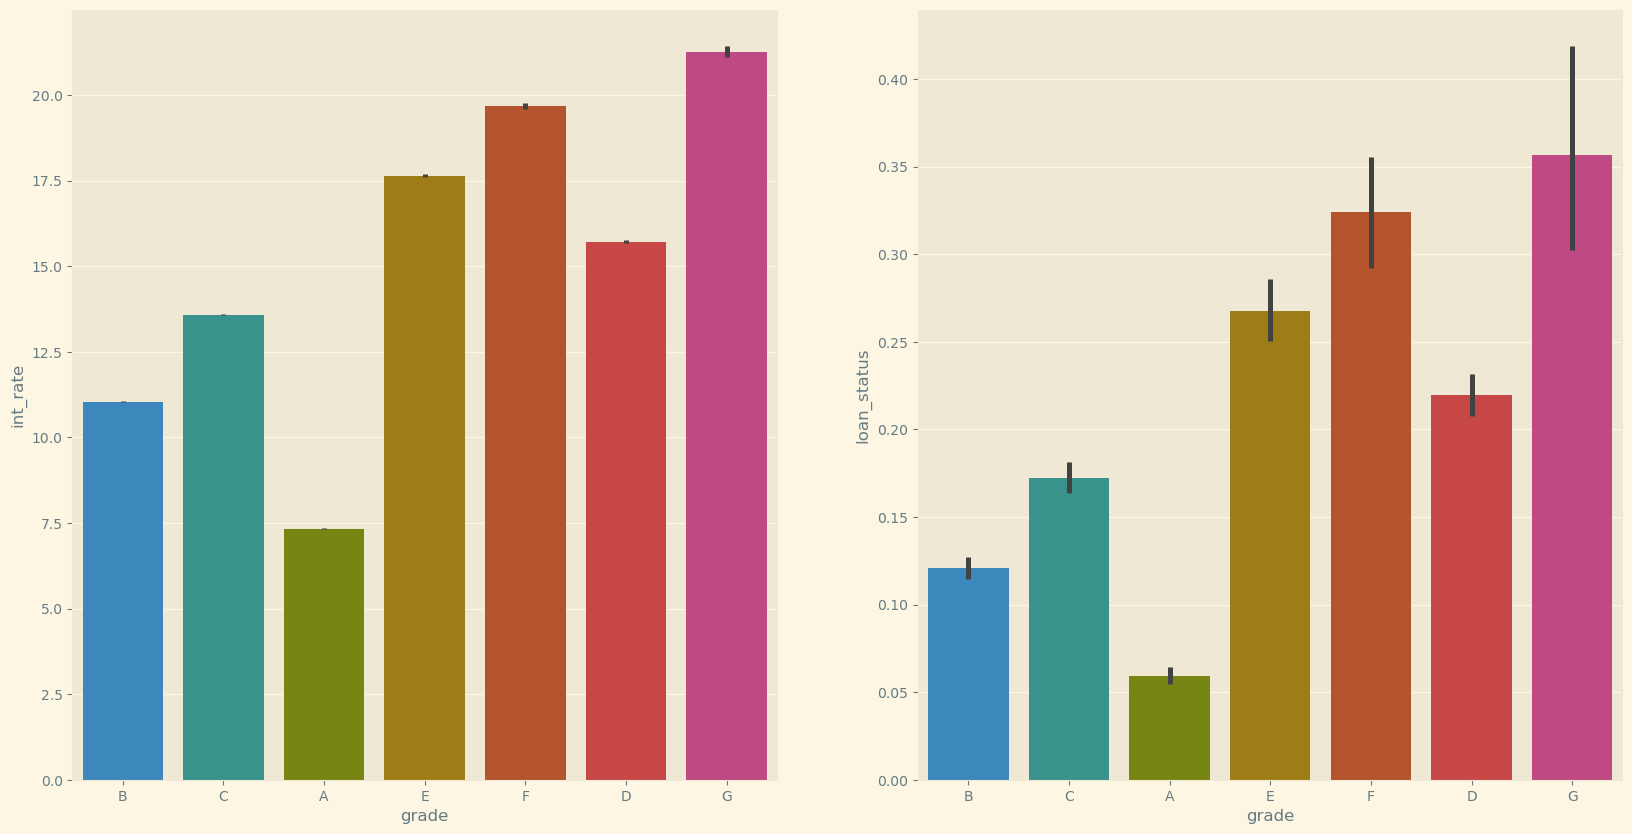

In [54]:
#ploting avg int rate accors the categorical variable
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x='grade', y = 'int_rate', data = loan_sub)
plt.subplot(1,2,2)
sns.barplot(x='grade', y= 'loan_status', data=loan_sub)
plt.show()

**Observation:-**
- interest rate is highly correlated with loan default.
- ``G`` grade has the highest default rate while A has the low default rate.
- From above we can conclud that the higher the interest rate the maximum chances of defaulting loan

In [55]:
loan_sub.loan_amnt.describe()

count    34972.000000
mean     10778.632906
std       7067.550179
min        500.000000
25%       5125.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

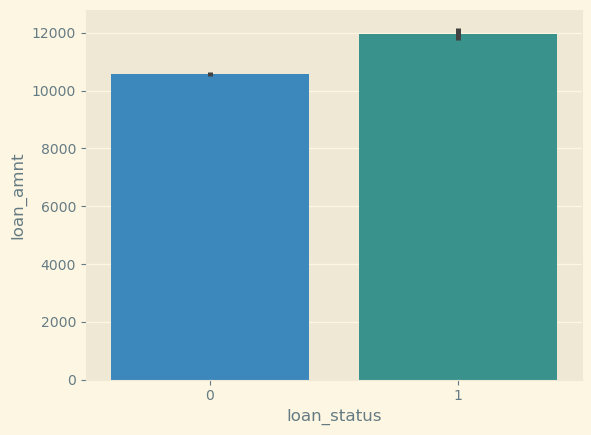

In [136]:
#G ha sthe highest loan amount avg while A ha sthe lowest average
sns.barplot(y='loan_amnt', x= 'loan_status', data= loan_sub)
plt.show()

In [57]:
#defining a function to plot the loan status and categorical variable
def cat_plot(cat):
    sns.barplot(x=cat, y='loan_status' , data= loan_sub)
    plt.show()

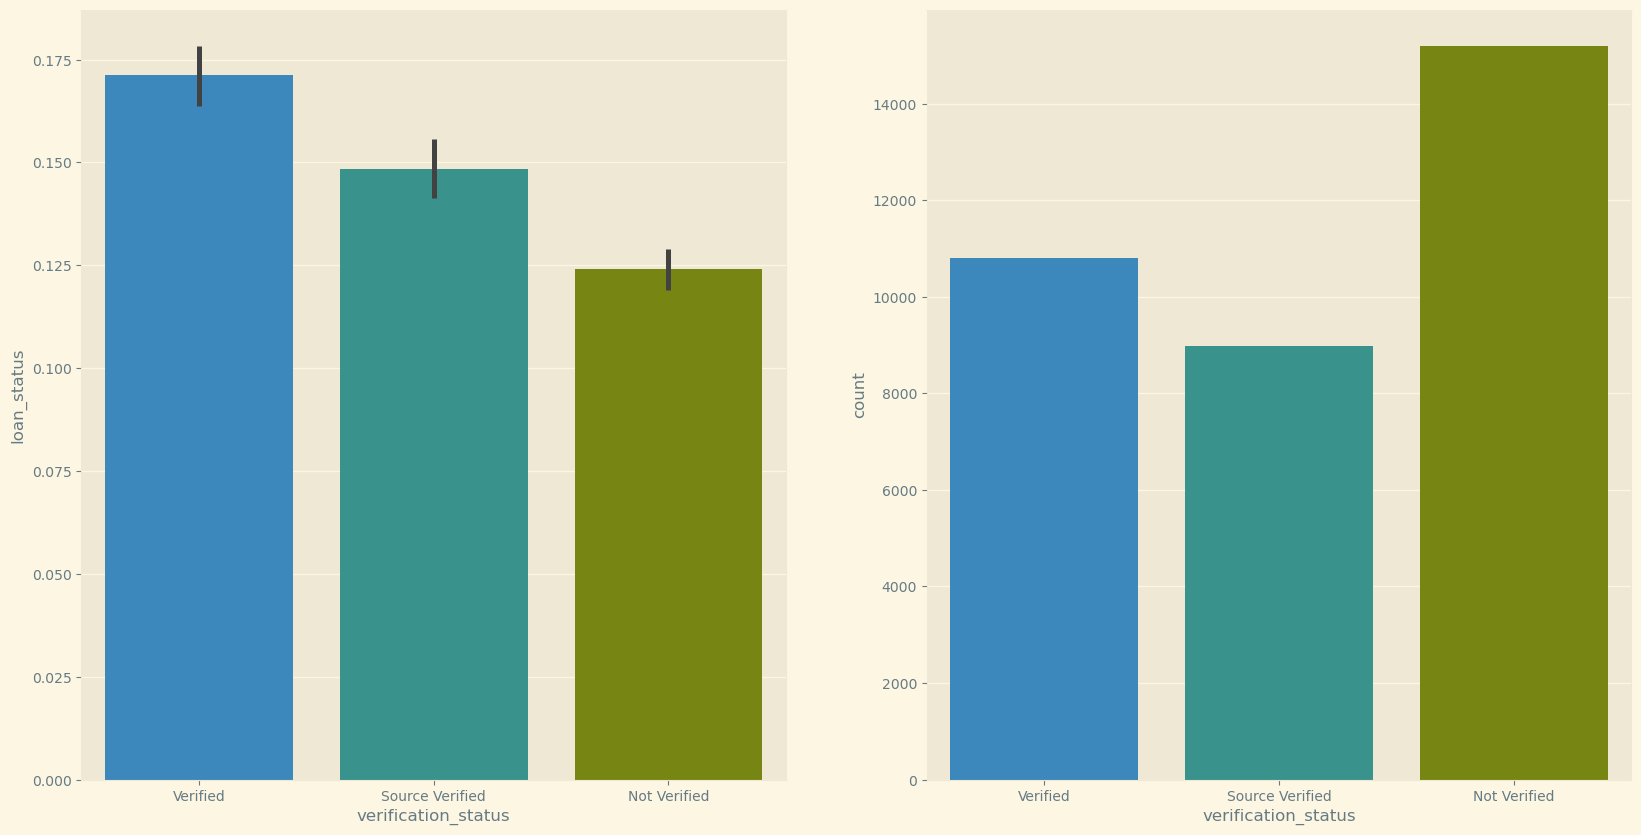

In [58]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x = loan_sub['verification_status'], y='loan_status', data = loan_sub)
plt.subplot(1,2,2)
sns.countplot(x = loan_sub['verification_status'])
plt.show()

**From baoev we can say that**
- Verification status doesn't have as such effect.
- Non verified applicats are high but they have the lowest loan default rate while Verified applicans has higher default rate

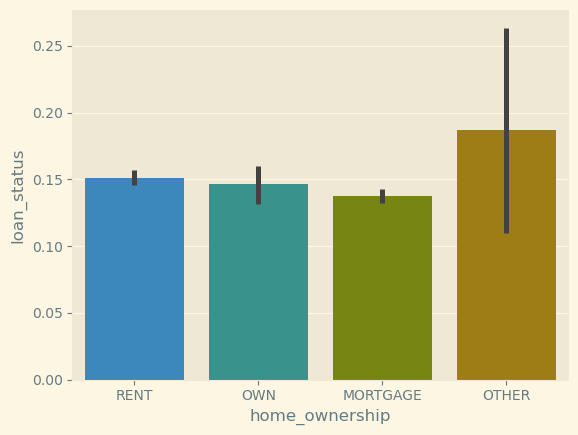

In [59]:
#home_ownership vs loan_status
cat_plot('home_ownership')

- Home_ownership is not a great discriminator.

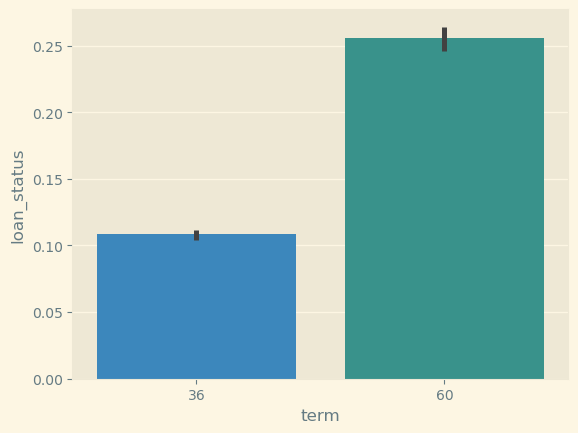

In [60]:
#term vs loan status
cat_plot('term')

- From above we can observe that the higher tenure rate has a high default rate

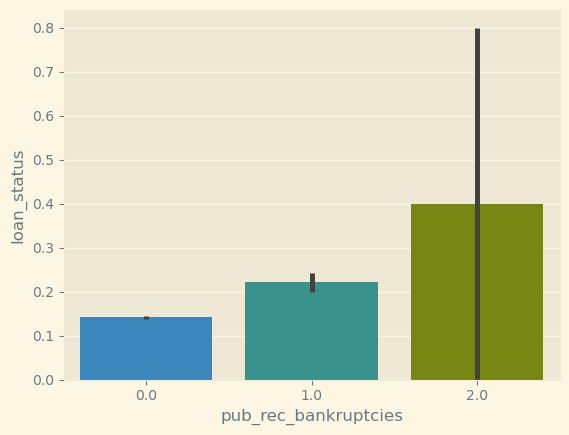

In [61]:
#loan_status vs public bankrupties record
cat_plot('pub_rec_bankruptcies')

- From above we can observe that the higher number of bankruptcies documnets the higher chance of loan default

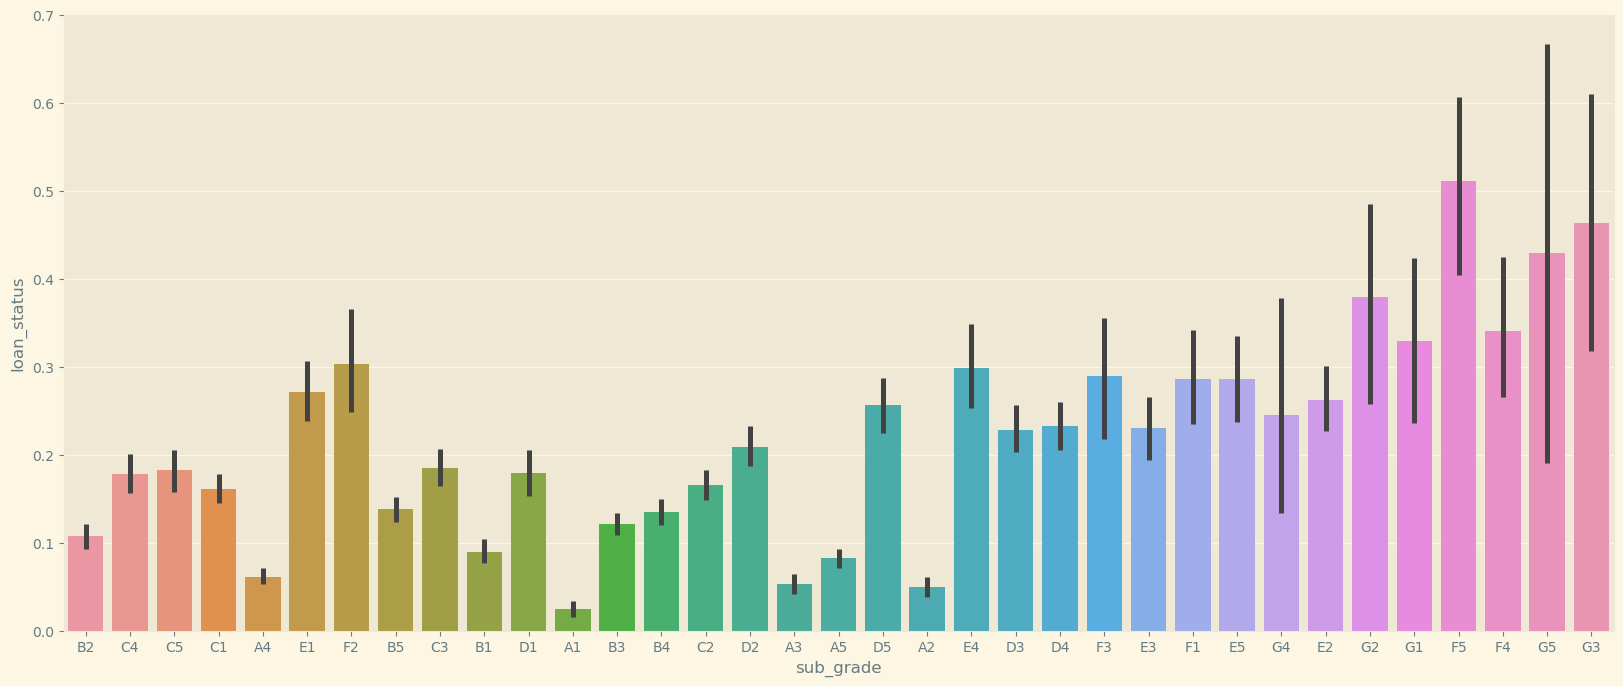

In [62]:
#
plt.figure(figsize=(20,8))
cat_plot('sub_grade')

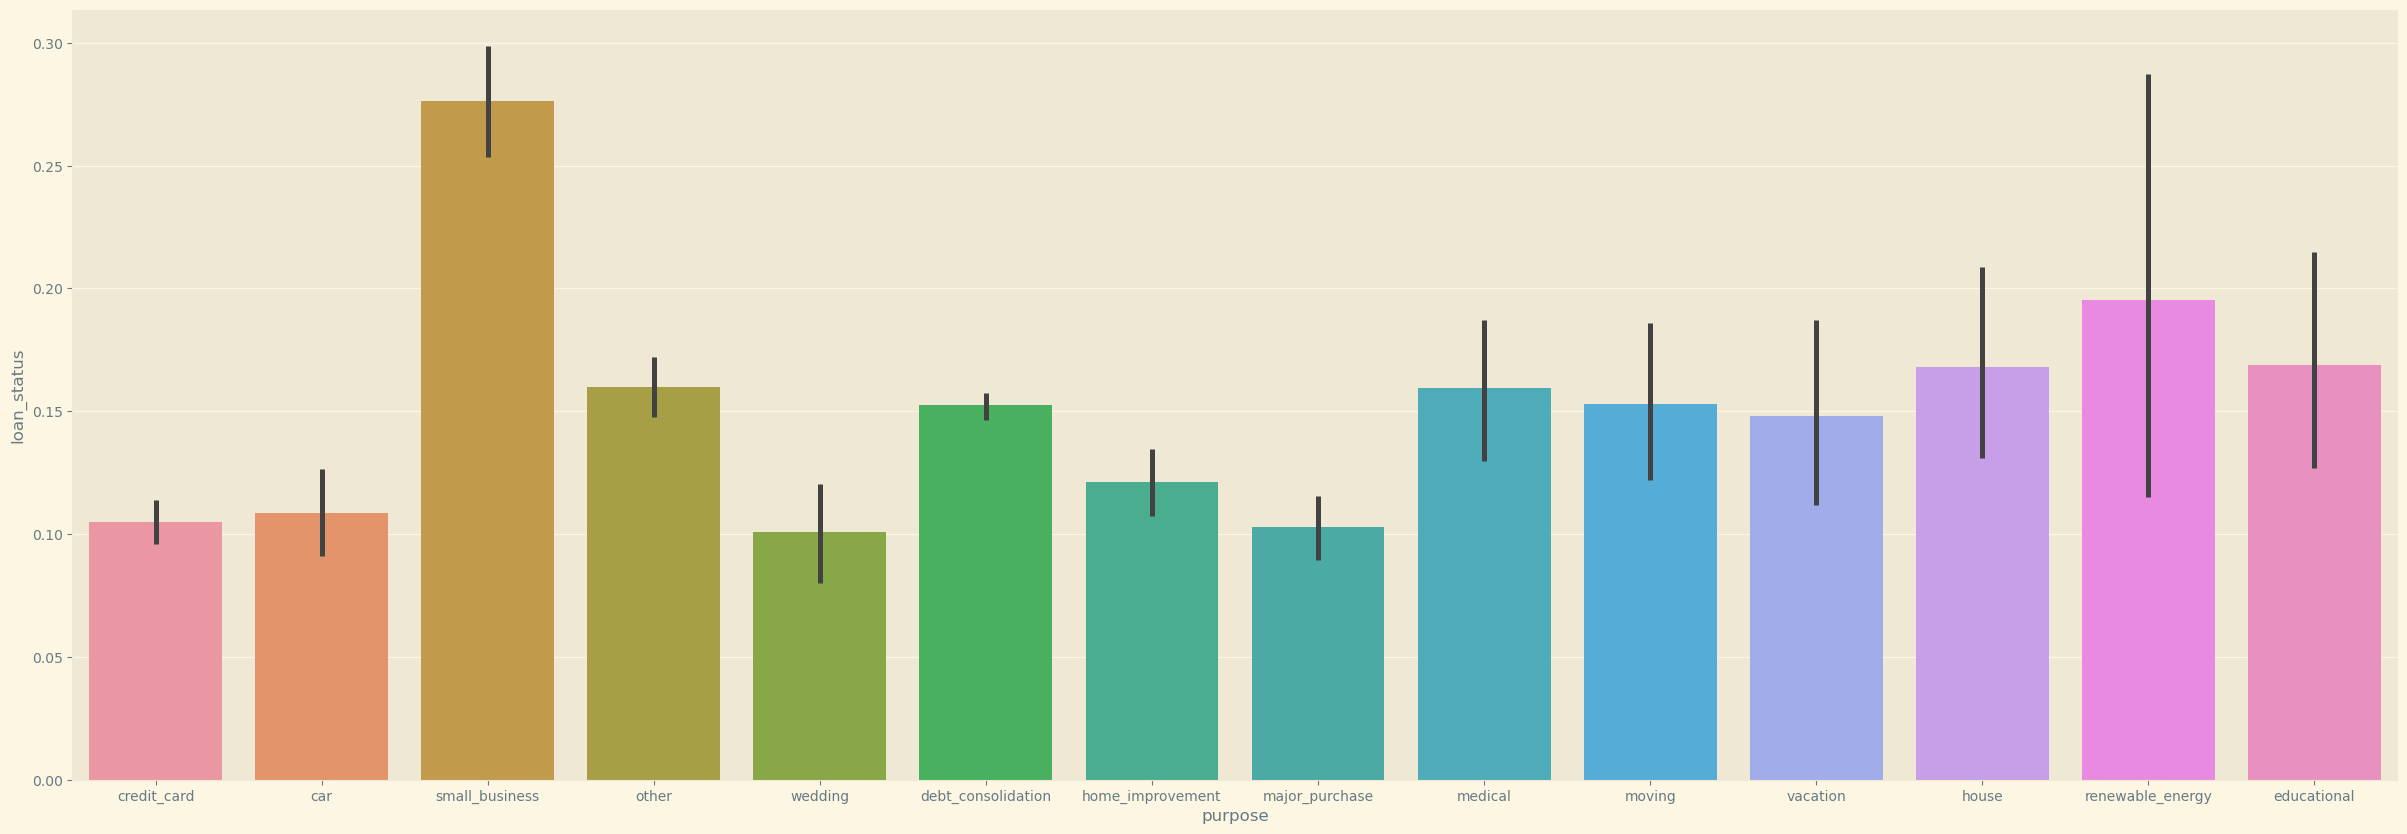

In [63]:
plt.figure(figsize=(30,10))
cat_plot('purpose')

- form above we can see that small business loans default more than renewable energy and education.

**Top 6 loan defaulter puposes**

- Small business
- Renewable energy
- House
- Education
- debit consolidation
- Credit card

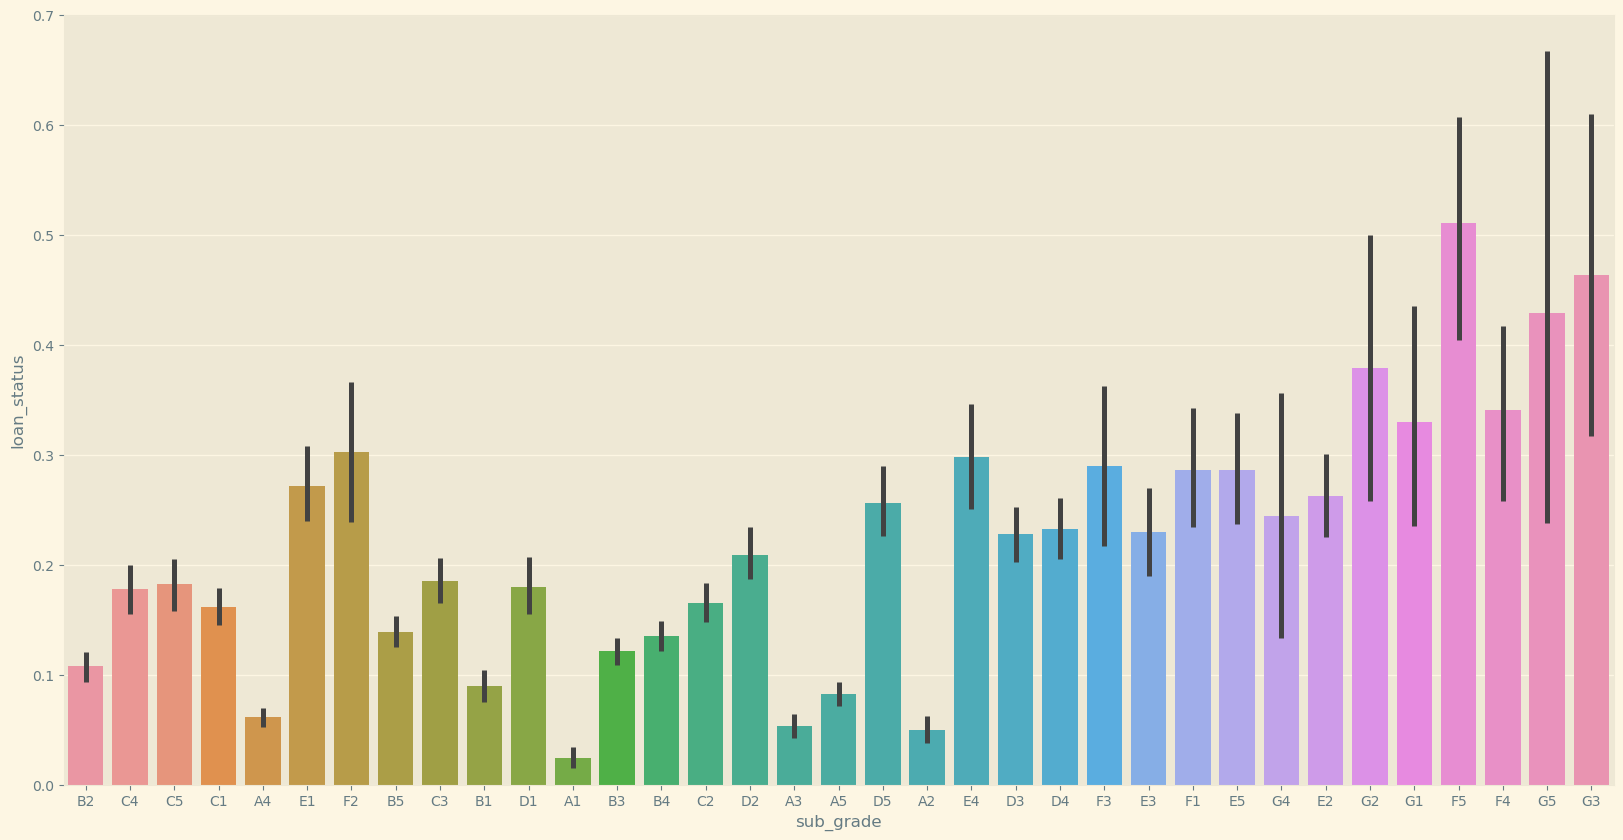

In [64]:
plt.figure(figsize=(20,10))
cat_plot('sub_grade')

- Here A1 is better than A2 than A3 and so on. The subgrade follows this pattern for every grade group except G4 which is performing better than G1, G2 and so on.

In [65]:
#lets alos understand the distribution of loans accorss years and months
#for that lets first convert the 'issue_d' to datetime
loan_sub.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [66]:
from datetime import datetime
loan_sub.issue_d = loan_sub['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [67]:
# extracting month and year from issue_date
loan_sub['month'] = loan_sub.issue_d.apply(lambda x: x.month)
loan_sub['year'] = loan_sub.issue_d.apply(lambda x: x.year)

In [68]:
#lets first observe the frequency of granted loans accross the year
loan_sub.year.value_counts()

2011    18755
2010    10695
2009     4466
2008     1049
2007        7
Name: year, dtype: int64

- form above we can see that the number of loans increased steadily accoss the year

In [69]:
#frequency of loans accross months
loan_sub.month.value_counts()

12    3843
11    3674
10    3365
9     3173
8     3122
7     3076
6     2922
5     2709
4     2637
3     2381
1     2060
2     2010
Name: month, dtype: int64

- Most loans are granted in December, and in general in the latter half of the year.

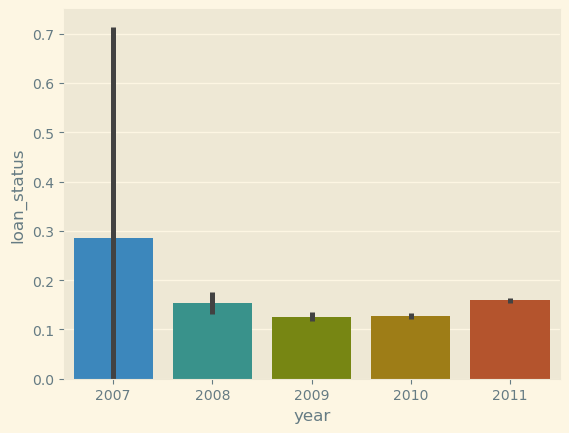

In [70]:
#lets compare the default rate accross the years
cat_plot('year')

- The default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

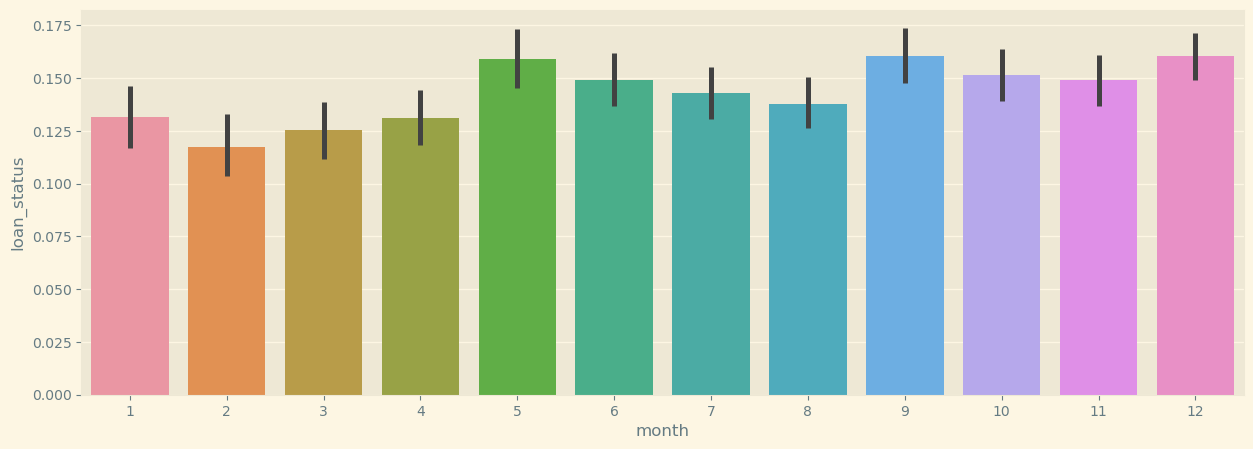

In [71]:
#lets check the default rate accros months
plt.figure(figsize=(15,5))
cat_plot('month')

- we cna not observe any significant variation accorss the months

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [72]:
# binning loan amount
def buckets(n):
    if (n<5000):
        return 'low'
    elif (n>=5000) and (n<15000):
        return 'medium'
    elif (n>=15000) and (n<30000):
        return 'high'
    else:
        return 'very High'
    
    
loan_sub['loan_cat'] = loan_sub.loan_amnt.apply(lambda x: buckets(x))

In [73]:
loan_sub.loan_cat.value_counts()

medium       19160
high          8204
low           6817
very High      791
Name: loan_cat, dtype: int64

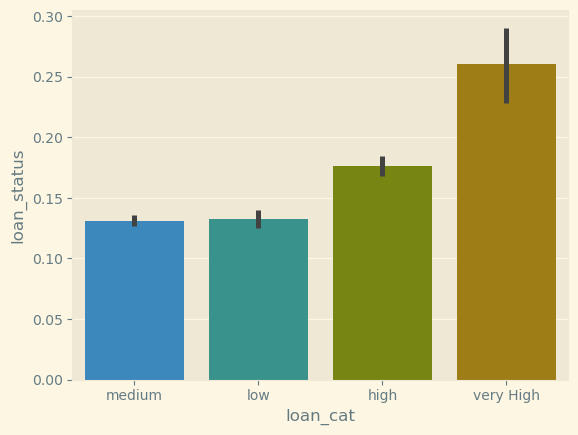

In [74]:
cat_plot('loan_cat')

**Observation:-**
- From above we can observe that the medium and low loan categories has has no significat difference in default rate where in general we can say that the higher the loan amount the higher the default rate.

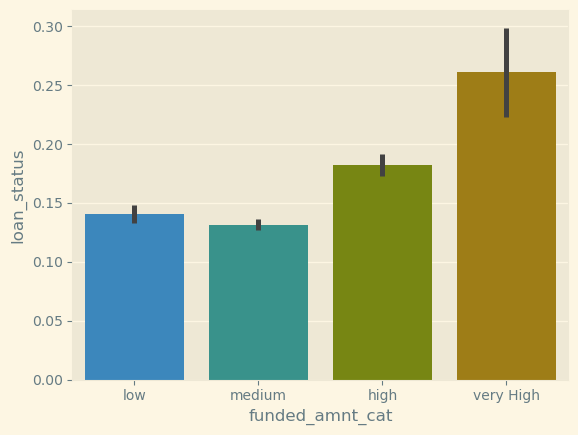

In [75]:
loan_sub['funded_amnt_cat'] = loan_sub.funded_amnt_inv.apply(lambda x: buckets(x))
cat_plot('funded_amnt_cat')

- The higher the funded amount, the higher default rate

In [76]:
loan_sub.int_rate.describe()

count    34972.00000
mean        11.93821
std          3.67680
min          5.42000
25%          8.94000
50%         11.83000
75%         14.42000
max         24.40000
Name: int_rate, dtype: float64

- The median of int_rate is 11.83

In [77]:
#lets create bins for intrate
def int_bin(n):
    if (n<=8.94000):
        return 'low'
    elif (n>8.94000) and (n<= 14.42000):
        return 'medium'
    else:
        return 'high'

loan_sub['int_cat'] = loan_sub.int_rate.apply(lambda x: int_bin(x))

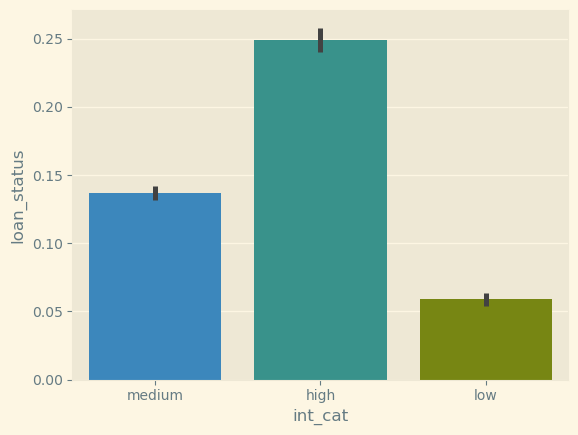

In [78]:
cat_plot('int_cat')

- The higher the interest rate the higher chances of loan default

In [79]:
loan_sub.dti.describe()

count    34972.000000
mean        13.505695
std          6.640919
min          0.000000
25%          8.420000
50%         13.640000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

In [80]:
loan_sub.dti.dtype

dtype('float64')

In [81]:
def cat_dti(n):
    if n<=10:
        return 'low'
    elif (n>10) and (n<=20):
        return 'medium'
    else:
        return 'high'

loan_sub['dti_cat'] = loan_sub.dti.apply(lambda x: cat_dti(x))

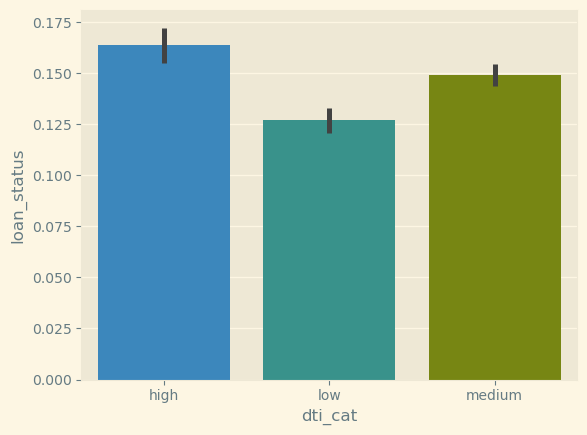

In [82]:
cat_plot('dti_cat')

- The higher the dti the higher the default rate as expected.

In [83]:
loan_sub.installment.describe()

count    34972.000000
mean       314.153769
std        199.375353
min         16.080000
25%        164.860000
50%        272.980000
75%        411.612500
max       1305.190000
Name: installment, dtype: float64

In [84]:
def install_cat(n):
    if n<=200:
        return 'low'
    elif (n>200) and (n<=400):
        return 'medium'
    elif (n>400) and (n<=600):
        return 'high'
    else:
        return 'very high'

loan_sub['installment_cat'] = loan_sub.installment.apply(lambda x: install_cat(x))

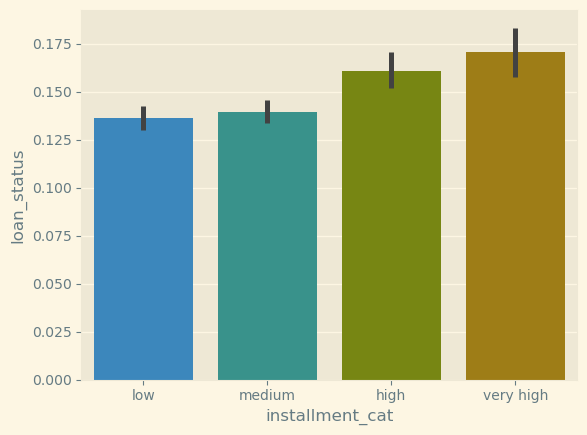

In [85]:
cat_plot('installment_cat')

- As expected, The higher the installment amount the higher the loand default charges.

In [86]:
def emplen_cat(n):
    if n<=1:
        return 'fresher'
    elif (n>1) and (n<=3):
        return 'junior'
    elif (n>3) and (n<=7):
        return 'senior'
    else:
        return 'expert'
    

loan_sub['emp_len_cat'] = loan_sub.emp_length.apply(lambda x: emplen_cat(x))

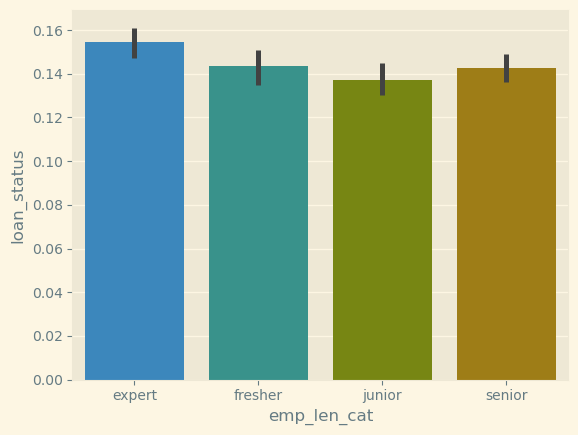

In [87]:
cat_plot('emp_len_cat')

- Employement length doesn't have any significant impact.

### Segmented univariate analysis

- Till now we have analysed various important factors, which can be defined as important predictors of loan default such as Interest rate, Annual income, purpose of loan, grade, installment amount, etc.

- In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

- This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

In [88]:
corr = loan_sub.corr()

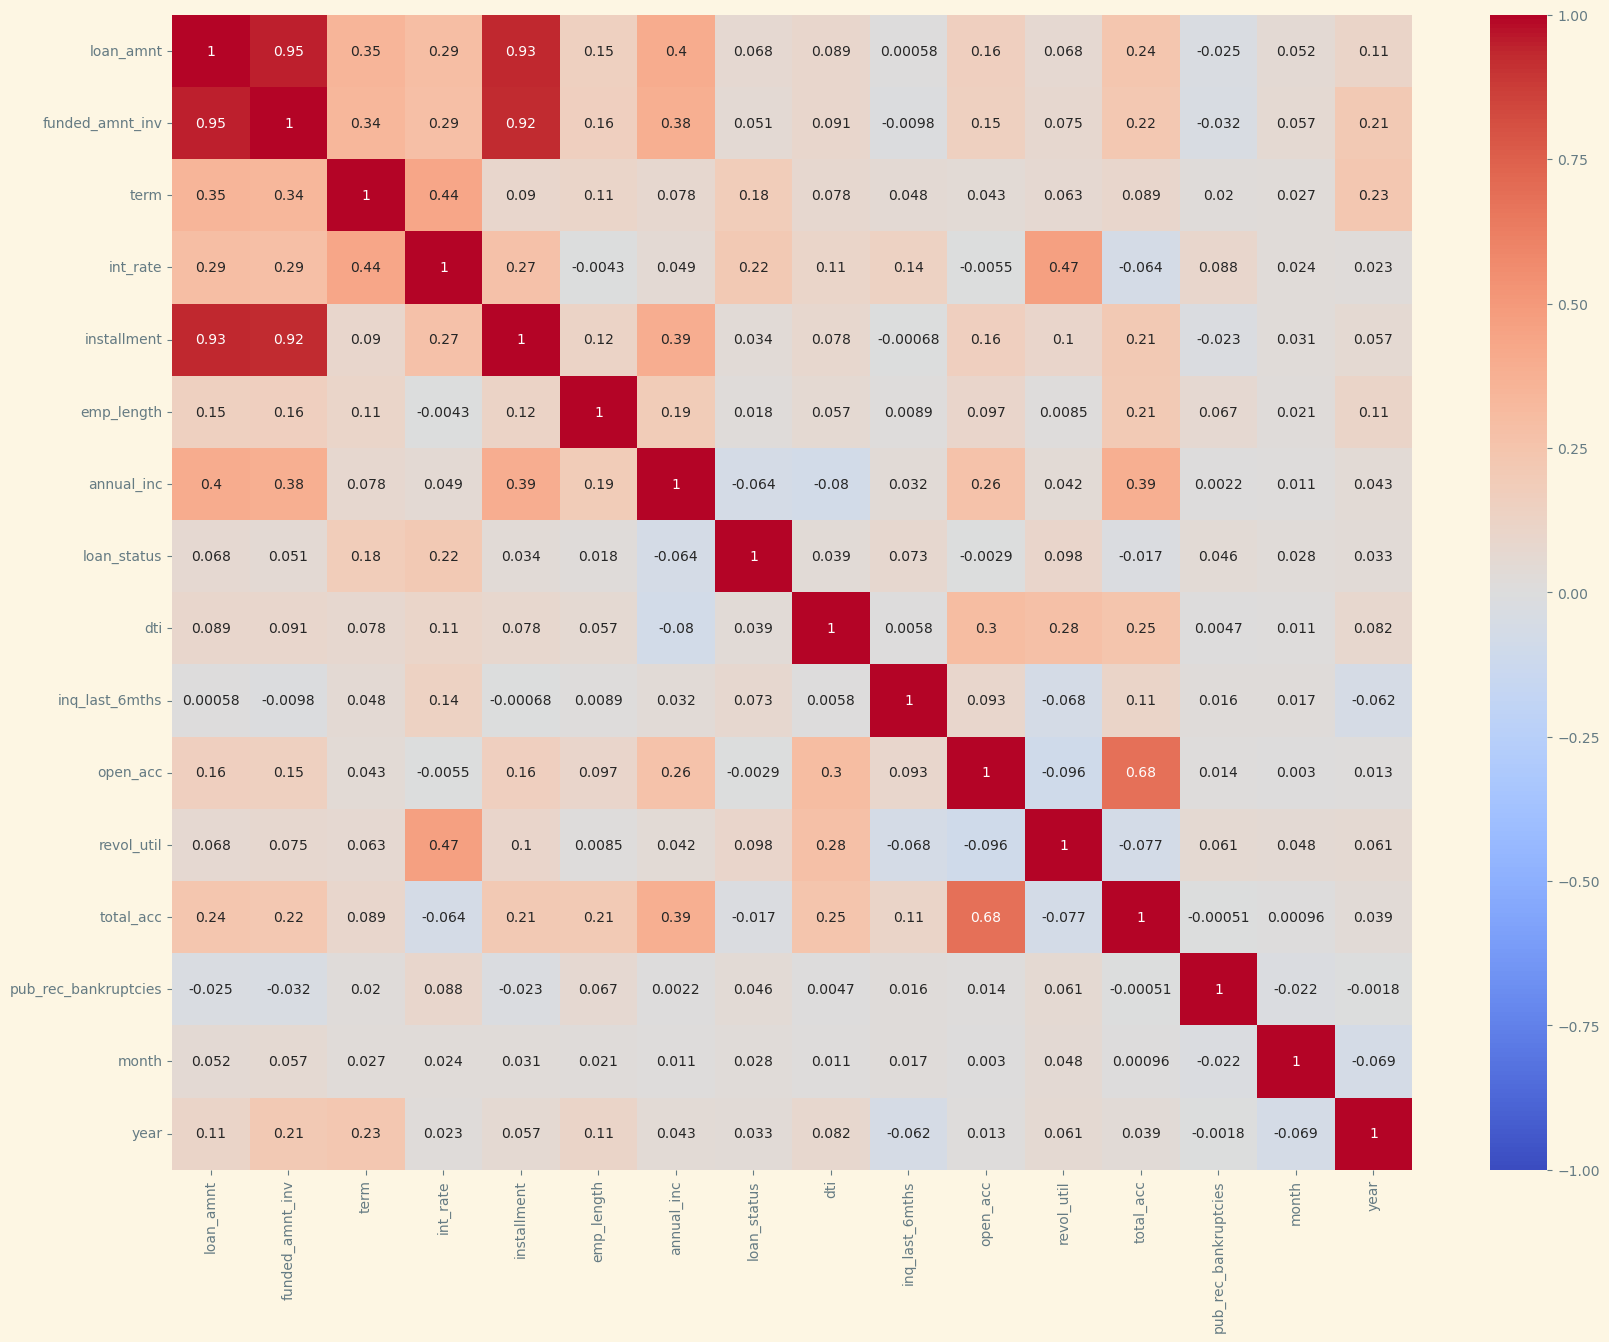

In [89]:
#ploting heatmap to observe the correlation.
plt.figure(figsize=(20,15))
sns.heatmap(corr, vmin= -1, vmax = 1, cmap = 'coolwarm', annot=True)
plt.show()

- form above we can observe that loan amount adn funded_amnt_inv has the highest correlation with installment which is usual
- loan status is somewhat higly linked with term and int_rate
- we cna not see any strong relation of loan staus with other independent variables

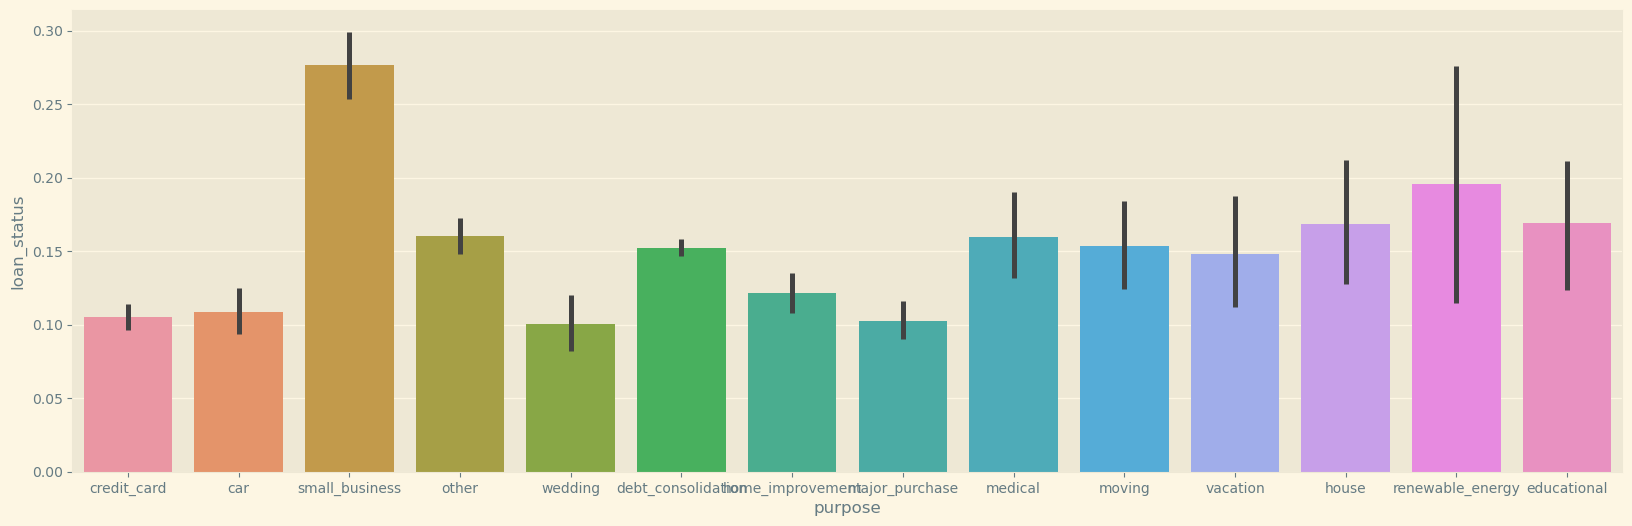

In [90]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(20, 6))
cat_plot('purpose')

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

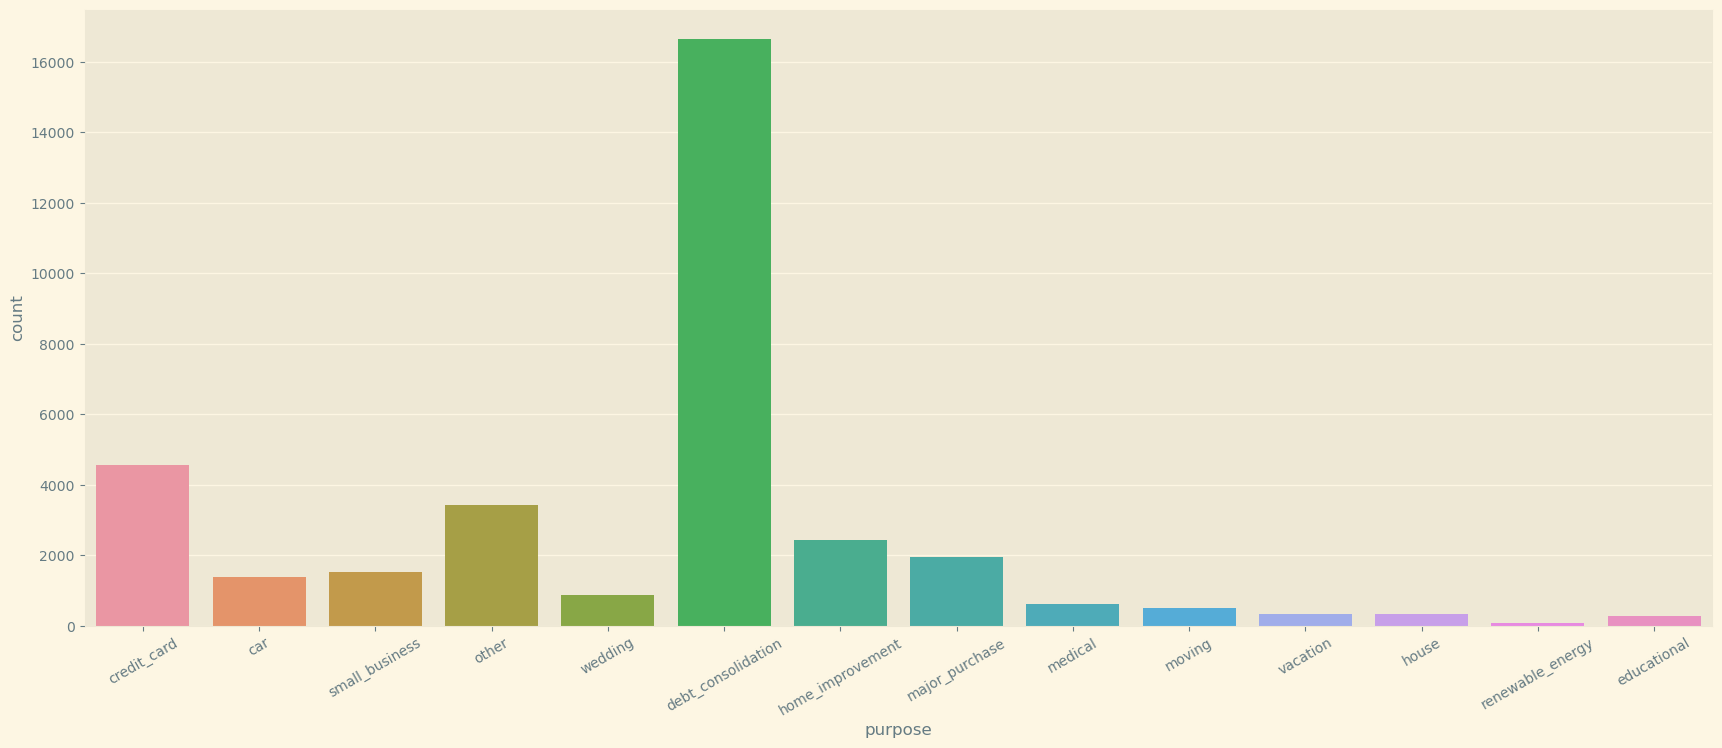

In [105]:
#fistly lets analysie the purpose column using catplot
plt.figure(figsize=(21,8))
sns.countplot('purpose', data=loan_sub)
plt.xticks(rotation= 30)
plt.show()

- <font color= brown>From above we can see that debit_consolidation, credit_card, home_improvement and major_purchases are 4 type of top loan purposes. Let's analyse them.</font>

In [92]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = loan_sub[loan_sub['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    16646
credit_card            4567
home_improvement       2435
major_purchase         1956
Name: purpose, dtype: int64

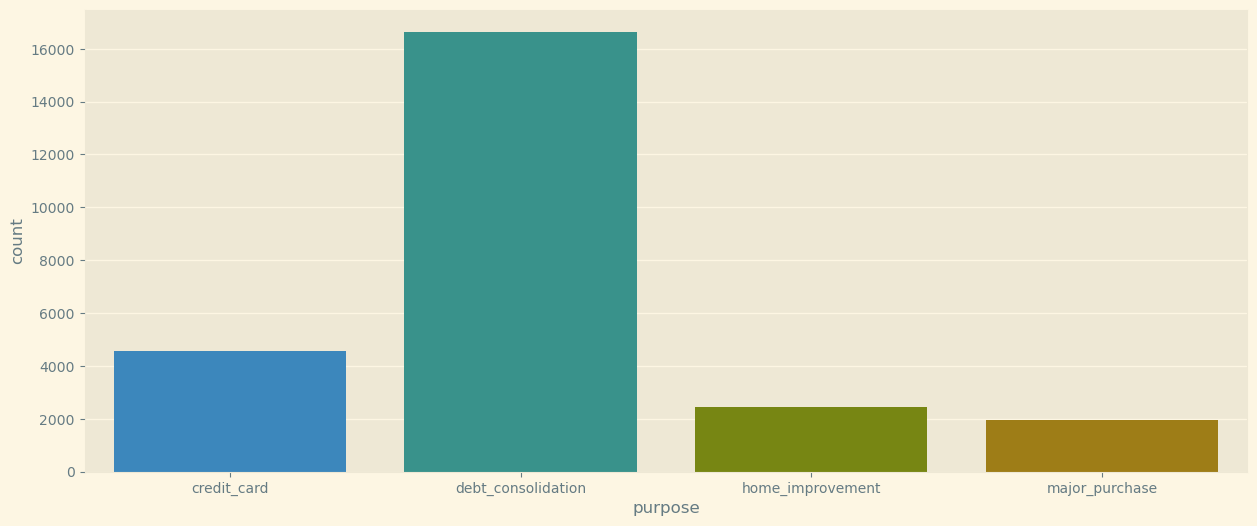

In [93]:
# plotting number of loans by purpose 
plt.figure(figsize=(15,6))
sns.countplot(x=df['purpose'])
plt.show()

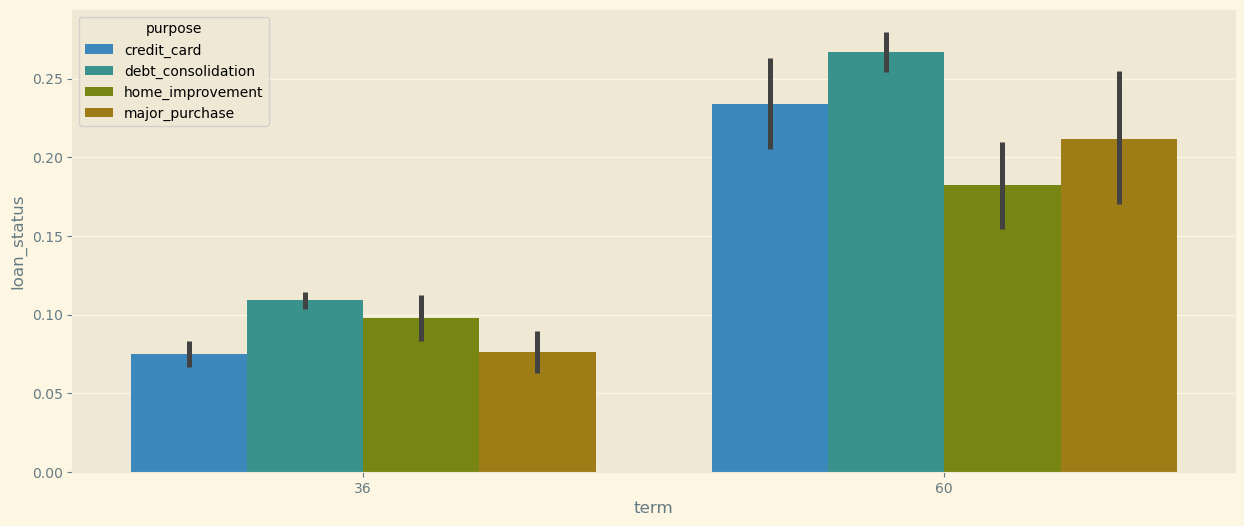

In [94]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=(15, 6))
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

- from above we can observe that debt_consolidation ha sthe highest load default rate for both 36 and 60 month tenure while home improvement has the 2nd higest highest loan dehfault in 36 months while in 60 months credit_card has the 2ndd higest lena default rate

In [95]:
#lets crate a function to take categorical variable and plot sgenemnted by purpose
def segment_plot(cat):
    plt.figure(figsize=(20,8))
    sns.barplot(x=cat, y='loan_status', hue='purpose', data=df)
    plt.show()

In [112]:
df.purpose.value_counts()

debt_consolidation    16646
credit_card            4567
home_improvement       2435
major_purchase         1956
Name: purpose, dtype: int64

In [98]:
#bucketing open account
def open_cat(n):
    if (n<=6):
        return 'low'
    elif (n>6) and (n<=15):
        return 'medium'
    else:
        return 'high'


df['open_acc_cat'] = df.open_acc.apply(lambda x: open_cat(x))

In [99]:
df.open_acc_cat.value_counts()

medium    16437
low        6785
high       2382
Name: open_acc_cat, dtype: int64

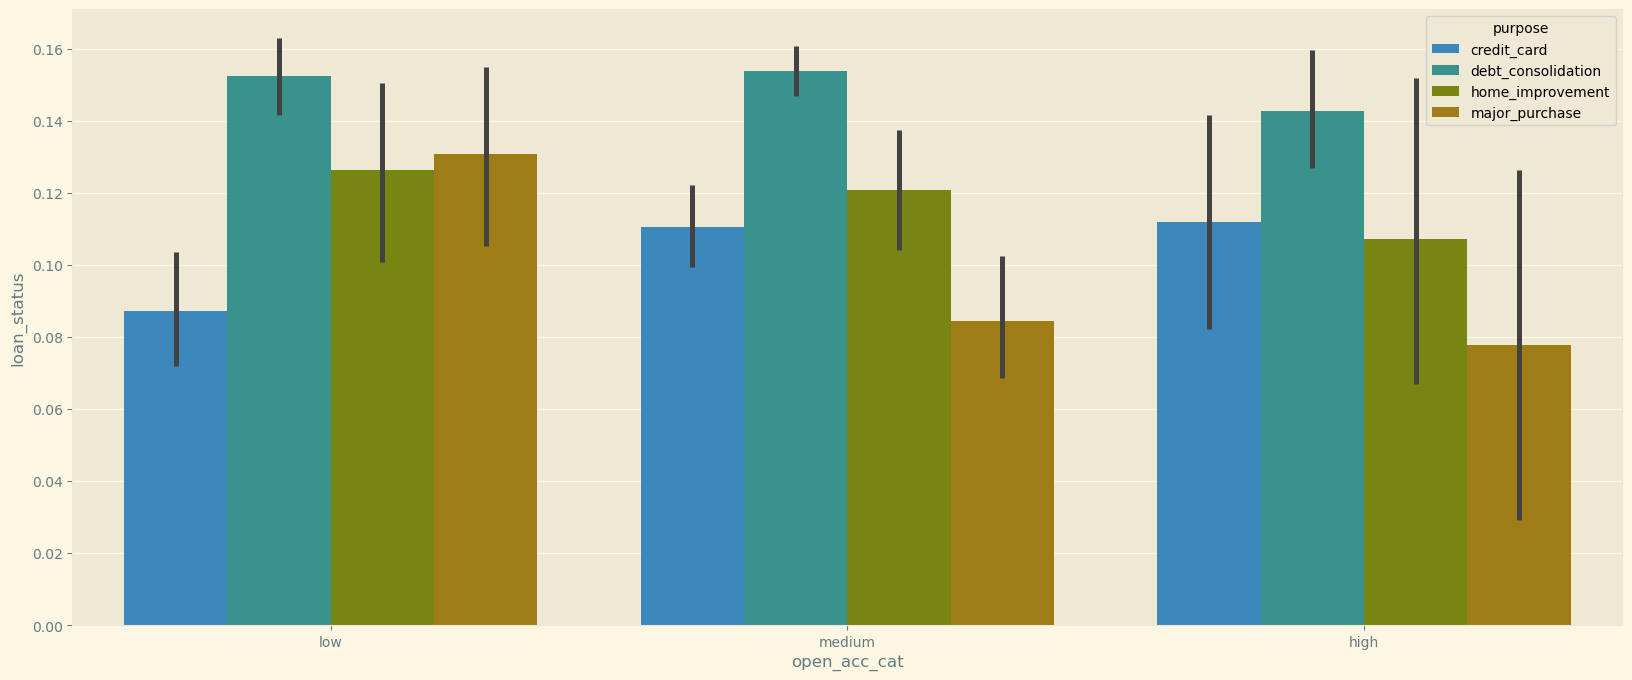

In [100]:
segment_plot('open_acc_cat')

- From above we can see that borrower has the highest probability of defaulting loan if they have debit_consolidation loan

**Onservation**
- From above analysis we can mark following features good predictor for loan default
    
    1.Applicants who use the loan to clear other debts
    
    2.Applicants who receive interest at the rate of 12%-14%
    
    3.Applicants who have an income of bellow 45000
    
    4.Loan amount is between 10500 - 12000
    
    5.Dti is above 20
    
    6.When monthly installments are above 600
    
    7.Term of 60 months
    
    8.When the purpose is 'debt_consolidation'
    
    9.Grade is 'G'
    
    10.And a total grade of 'G3' level.